In [ ]:
import time
import os
import numpy as np
from PIL import Image, ImageDraw
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [ ]:
%run ../sqlite_execution.py
db2 = DB_V2(dir_prefix="../")
for captcha_string in os.listdir("../../data/images/v2/"):
    db2.add_untracked_images(captcha_string)

In [ ]:
db2.get_info()
paths, positions = db2.get_solved_captchas(count=10)
images = [Image.open("../../data/images/v2/"+path) for path in paths]

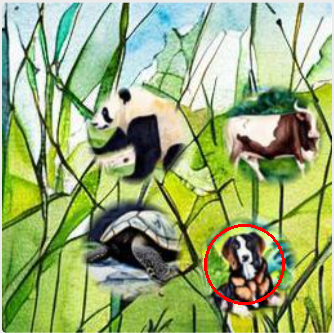

In [ ]:
%run v2_handler.py
img = display_image_with_circle(images[0], positions[0])

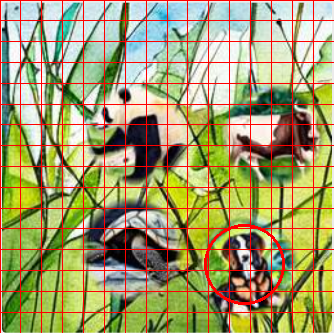

In [ ]:
edit = img.copy()
draw = ImageDraw.Draw(edit)
grid_size = 16
for x in np.linspace(0, edit.width, grid_size+1):
    draw.line((x, 0, x, edit.height), fill="red", width=1)
for y in np.linspace(0, edit.height, grid_size+1):
    draw.line((0, y, edit.width, y), fill="red", width=1)
display(edit)

In [ ]:
# all coordinates in the grid 
edit = img.copy()
draw = ImageDraw.Draw(edit)

coords = np.meshgrid(
    np.linspace(0,1, grid_size), 
    np.linspace(0,1, grid_size)
)
coords = np.stack(coords, axis=-1)
coords = coords.reshape(-1, 2)
coords.shape

(256, 2)

0.9999735711226736


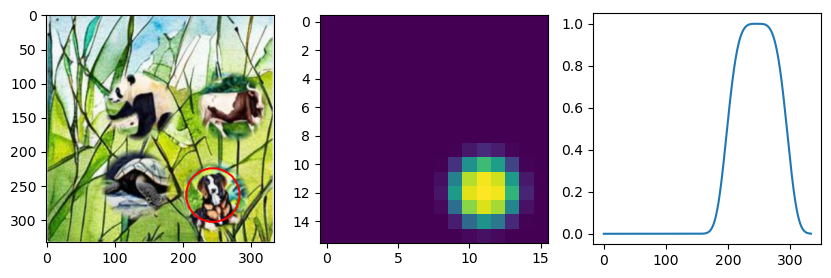

In [ ]:
score = lambda x,y, target_x, target_y: np.e**(-(((x-target_x)**2 + (y-target_y)**2) * 40)**2)
target_x, target_y = np.array(positions[0]) / (330,334)
scores = np.array([score(x,y, target_x, target_y) for x,y in zip(coords[:,0], coords[:,1])])
print(scores.max())
scores_img = scores.reshape(grid_size,grid_size)
diag = np.vstack((np.linspace(0,1, num=1000), np.ones(1000)*target_y)).T

from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,3, figsize=(10,3))
axs[0].imshow(img)
axs[1].imshow(scores_img)
axs[2].plot(np.linspace(0,img.width, 1000), [score(diag[i][0], diag[i][1], target_x, target_y) for i in range(len(diag))])

<BarContainer object of 16 artists>

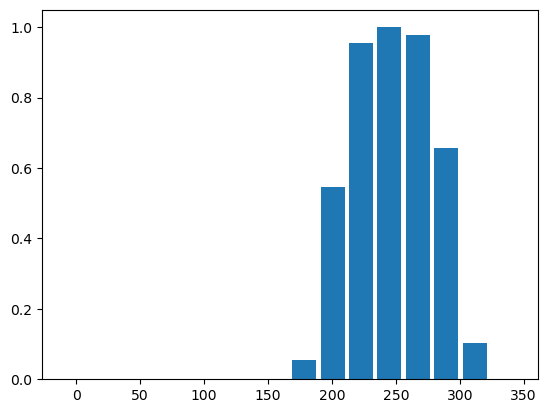

In [ ]:
diag = np.vstack((np.linspace(0,1, num=grid_size), np.ones(grid_size)*target_y)).T
plt.bar(np.linspace(0,img.width, grid_size), [score(diag[i][0], diag[i][1], target_x, target_y) for i in range(len(diag))], width=(img.width/grid_size)*0.9)

x shape: (10, 3, 333, 334)
[[[[0.5559291  0.55786854 0.5535744  ... 0.5544985  0.55646837
    0.55463815]
   [0.54839706 0.54766667 0.5411593  ... 0.5456074  0.5395096
    0.5471766 ]
   [0.5477383  0.54291016 0.54496855 ... 0.54409087 0.54409087
    0.54012007]
   ...
   [0.543275   0.54855835 0.54403156 ... 0.5499112  0.5489322
    0.5422993 ]
   [0.5457     0.54236424 0.5436966  ... 0.54698783 0.54849434
    0.54240996]
   [0.54464287 0.5450786  0.5412056  ... 0.5489446  0.5489446
    0.54703236]]]


 [[[0.55100715 0.55260724 0.55399257 ... 0.55028814 0.55112404
    0.55194646]
   [0.5451814  0.5445668  0.54779947 ... 0.53595686 0.53595686
    0.537668  ]
   [0.54576904 0.53640884 0.54185355 ... 0.53306997 0.5308506
    0.54221   ]
   ...
   [0.54309666 0.55301994 0.55301994 ... 0.5512225  0.5440608
    0.54269004]
   [0.53995526 0.54331315 0.54187506 ... 0.5396042  0.5381344
    0.53780967]
   [0.5496278  0.5453356  0.5470284  ... 0.5365379  0.5323698
    0.54086244]]]


 [[[0.5545

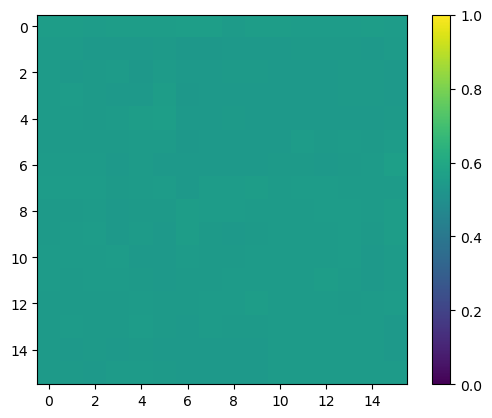

In [85]:
%run v2_training_classes
model = Model_Training(16)
pred = model.predict_pil(images)
plt.imshow(pred[0][0], vmin=0, vmax=1)
plt.colorbar()

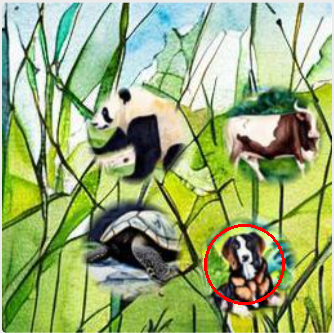

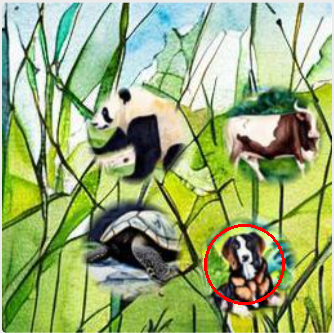

In [78]:
%run v2_handler.py
display_image_with_circle(images[0], positions[0])

image file is truncated
Could not load image: dog/13-13-08-28-988192.png
133
(500, 536)
Found 133 useable images
x shape: (133, 3, 333, 334)
scores shape (133, 16, 16)
Sample 0:
 [[[0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  ...
  [0.92156863 0.92156863 0.5254902  ... 0.86666667 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.90196078 ... 0.90588235 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]]

 [[0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  ...
  [0.92156863 0.92156863 0.58039216 ... 0.88235294 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.90196078 ... 0.90980392 0.92156863 0.921

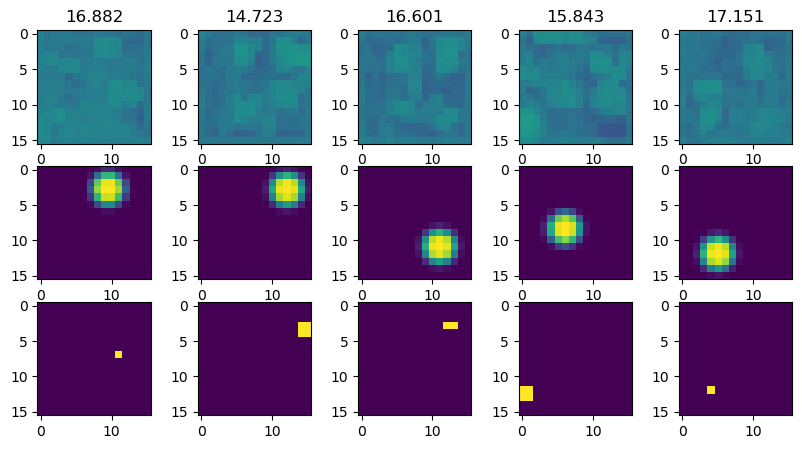

Epoch: 2, Train Loss: 0.0151 Test Loss: 0.0133
sum tensor(15.6589)
tensor([[0.3732, 0.2761, 0.4331, 0.4167, 0.3066, 0.2719, 0.2770, 0.2778, 0.3792,
         0.3792, 0.3117, 0.2302, 0.2765, 0.2861, 0.2144, 0.3260],
        [0.3474, 0.2853, 0.4099, 0.3912, 0.3185, 0.3275, 0.3761, 0.3442, 0.5887,
         0.6349, 0.6272, 0.5391, 0.2198, 0.1888, 0.2034, 0.3292],
        [0.3537, 0.3608, 0.4313, 0.3568, 0.1983, 0.2746, 0.3186, 0.3442, 0.6108,
         0.6417, 0.6272, 0.5391, 0.2203, 0.2366, 0.2342, 0.3246]])


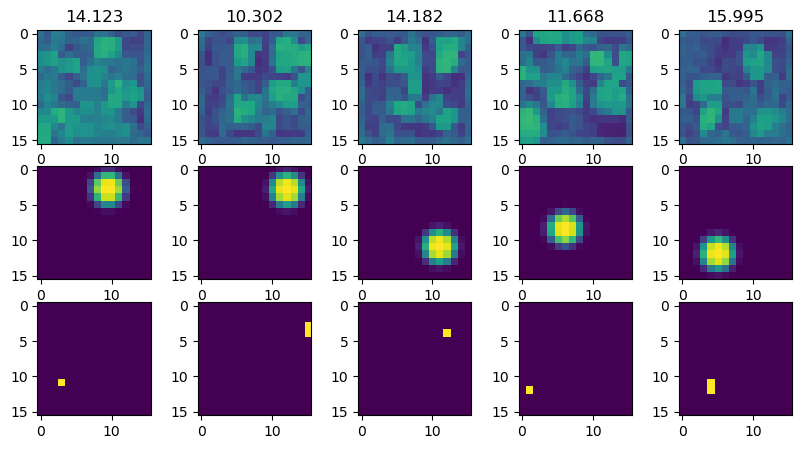

Epoch: 3, Train Loss: 0.0136 Test Loss: 0.0123
sum tensor(15.6589)
tensor([[0.3302, 0.2452, 0.4751, 0.4567, 0.2775, 0.2240, 0.2369, 0.2797, 0.4327,
         0.4327, 0.3311, 0.1920, 0.2436, 0.2566, 0.1626, 0.2891],
        [0.2931, 0.2568, 0.4502, 0.4270, 0.2893, 0.3387, 0.4105, 0.3594, 0.6448,
         0.7060, 0.7060, 0.6006, 0.1812, 0.1476, 0.1630, 0.2931],
        [0.2983, 0.4183, 0.5035, 0.4093, 0.1561, 0.2818, 0.3241, 0.3641, 0.6790,
         0.7078, 0.7060, 0.6006, 0.1884, 0.2051, 0.1940, 0.2905]])


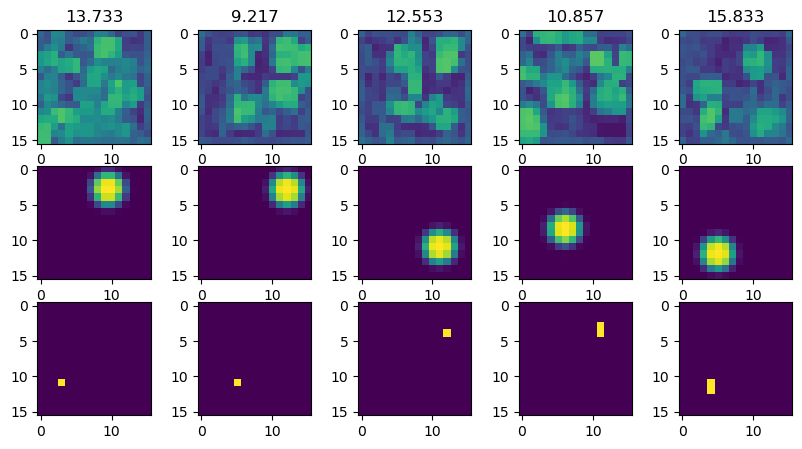

Epoch: 4, Train Loss: 0.0129 Test Loss: 0.0134
sum tensor(15.6589)
tensor([[0.2696, 0.1686, 0.2892, 0.2641, 0.1952, 0.1652, 0.1698, 0.1664, 0.2874,
         0.2874, 0.2078, 0.1239, 0.1595, 0.1673, 0.1055, 0.2468],
        [0.2151, 0.1711, 0.2722, 0.2456, 0.1981, 0.2177, 0.2828, 0.2845, 0.6335,
         0.6966, 0.6500, 0.5701, 0.1101, 0.0970, 0.1066, 0.2410],
        [0.2180, 0.2268, 0.2661, 0.2083, 0.0617, 0.1516, 0.2091, 0.2928, 0.6744,
         0.6966, 0.6356, 0.5763, 0.1297, 0.1436, 0.1417, 0.2371]])


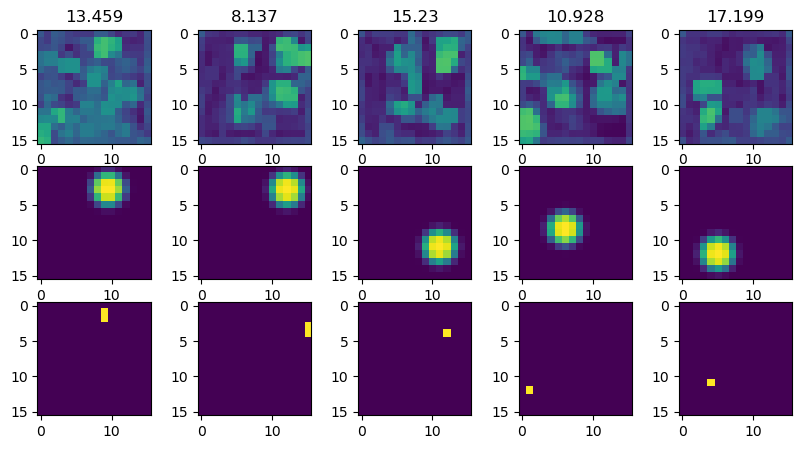

Epoch: 5, Train Loss: 0.0127 Test Loss: 0.0116
sum tensor(15.6589)
tensor([[0.2560, 0.1851, 0.4266, 0.4266, 0.2183, 0.1822, 0.2028, 0.2376, 0.4081,
         0.4081, 0.3034, 0.1680, 0.1789, 0.1917, 0.1093, 0.2456],
        [0.1939, 0.2017, 0.4264, 0.4243, 0.2283, 0.3662, 0.4210, 0.3464, 0.6602,
         0.7417, 0.7417, 0.6325, 0.1399, 0.1067, 0.1157, 0.2531],
        [0.2050, 0.4122, 0.4601, 0.3940, 0.1027, 0.3011, 0.3277, 0.3629, 0.7177,
         0.7546, 0.7417, 0.6618, 0.1547, 0.1731, 0.1529, 0.2541]])


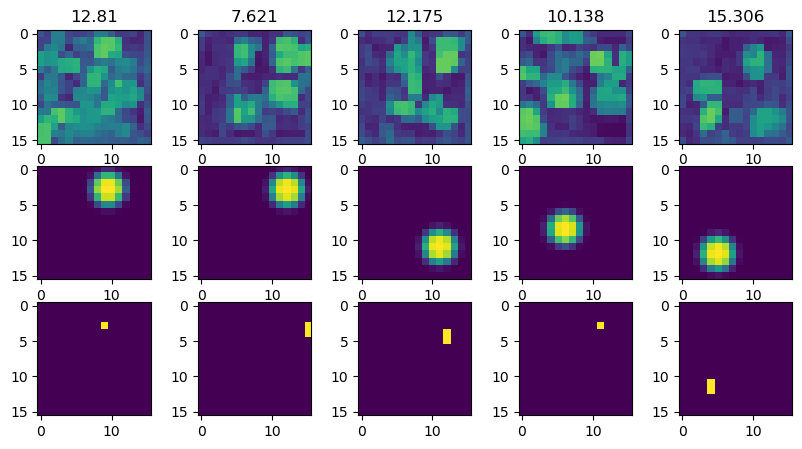

Epoch: 6, Train Loss: 0.0128 Test Loss: 0.0117
sum tensor(15.6589)
tensor([[0.2590, 0.2142, 0.4831, 0.4831, 0.2587, 0.2102, 0.2357, 0.2730, 0.4426,
         0.4426, 0.3483, 0.2090, 0.1960, 0.2063, 0.1224, 0.2590],
        [0.2027, 0.2410, 0.4754, 0.4754, 0.2731, 0.4236, 0.4614, 0.3748, 0.6370,
         0.7207, 0.7207, 0.6142, 0.1656, 0.1299, 0.1409, 0.2623],
        [0.2576, 0.4595, 0.5049, 0.4416, 0.1456, 0.3694, 0.3918, 0.3905, 0.6920,
         0.7240, 0.7207, 0.6684, 0.1824, 0.1993, 0.1757, 0.2634]])


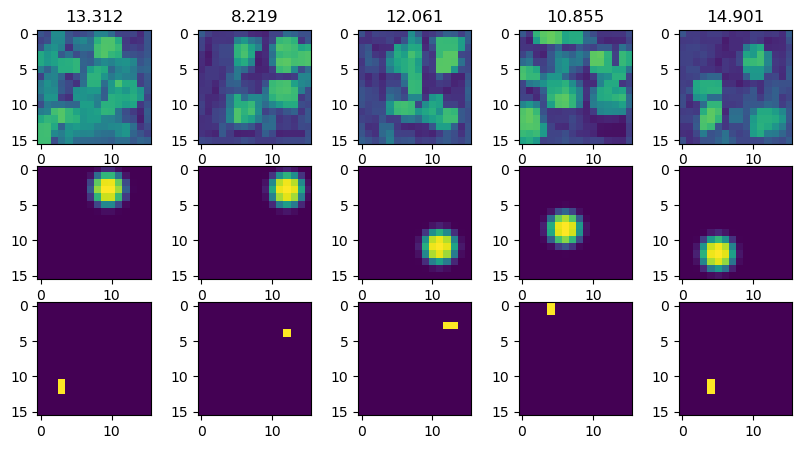

Epoch: 7, Train Loss: 0.0124 Test Loss: 0.0114
sum tensor(15.6589)
tensor([[0.2198, 0.1976, 0.3823, 0.3823, 0.2429, 0.1983, 0.2108, 0.2462, 0.3933,
         0.3933, 0.3073, 0.1992, 0.1669, 0.1669, 0.1024, 0.2320],
        [0.1675, 0.1976, 0.4046, 0.4046, 0.2455, 0.3551, 0.3875, 0.3550, 0.6220,
         0.6991, 0.6991, 0.6014, 0.1536, 0.1402, 0.1485, 0.2328],
        [0.2008, 0.3841, 0.4290, 0.3775, 0.1329, 0.3256, 0.3530, 0.3722, 0.6743,
         0.7038, 0.6991, 0.6350, 0.1792, 0.1952, 0.1773, 0.2295]])


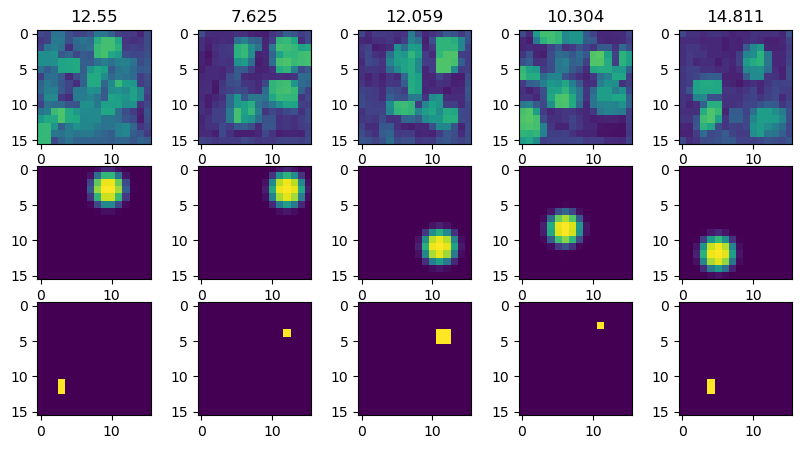

Epoch: 8, Train Loss: 0.0114 Test Loss: 0.0107
sum tensor(15.6589)
tensor([[0.1758, 0.1803, 0.4060, 0.4060, 0.1931, 0.1913, 0.2071, 0.2160, 0.4180,
         0.4238, 0.3504, 0.2125, 0.1691, 0.1691, 0.0839, 0.1979],
        [0.1403, 0.1803, 0.4642, 0.4642, 0.2014, 0.3852, 0.3852, 0.3331, 0.6758,
         0.7543, 0.7543, 0.6332, 0.1466, 0.1320, 0.1407, 0.1959],
        [0.1915, 0.4383, 0.4871, 0.4385, 0.1247, 0.3677, 0.3677, 0.3689, 0.7403,
         0.7695, 0.7543, 0.6853, 0.1731, 0.1816, 0.1655, 0.1936]])


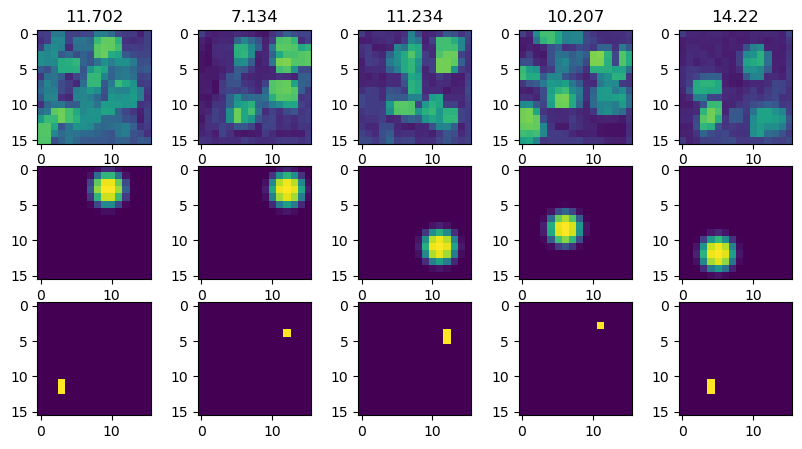

Epoch: 9, Train Loss: 0.0110 Test Loss: 0.0105
sum tensor(15.6589)
tensor([[0.1416, 0.1526, 0.3577, 0.3577, 0.1624, 0.1745, 0.1823, 0.1710, 0.3748,
         0.3998, 0.3318, 0.1947, 0.1372, 0.1372, 0.0671, 0.1694],
        [0.1087, 0.1526, 0.4565, 0.4565, 0.1827, 0.3709, 0.3709, 0.2915, 0.6739,
         0.7618, 0.7618, 0.6043, 0.1204, 0.1111, 0.1183, 0.1541],
        [0.1587, 0.3824, 0.4405, 0.4270, 0.1080, 0.3562, 0.3562, 0.3384, 0.7552,
         0.7939, 0.7609, 0.7135, 0.1526, 0.1625, 0.1455, 0.1518]])


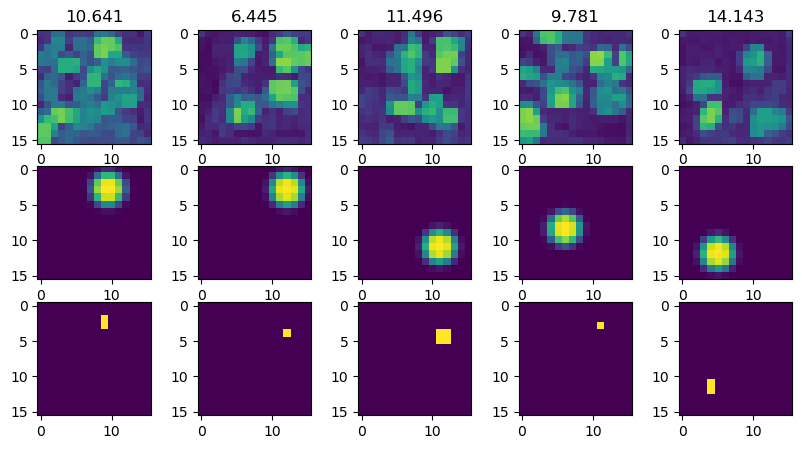

Epoch: 10, Train Loss: 0.0107 Test Loss: 0.0105
sum tensor(15.6589)
tensor([[0.1266, 0.1647, 0.3120, 0.3120, 0.1640, 0.1773, 0.1806, 0.1693, 0.3465,
         0.3673, 0.3098, 0.1962, 0.1224, 0.1224, 0.0660, 0.1618],
        [0.1213, 0.1647, 0.3897, 0.3897, 0.1689, 0.3335, 0.3335, 0.2837, 0.6587,
         0.7402, 0.7566, 0.5817, 0.1186, 0.1209, 0.1274, 0.1438],
        [0.1470, 0.3239, 0.3673, 0.3503, 0.1210, 0.3272, 0.3272, 0.3299, 0.7450,
         0.7794, 0.7566, 0.7124, 0.1563, 0.1646, 0.1482, 0.1410]])


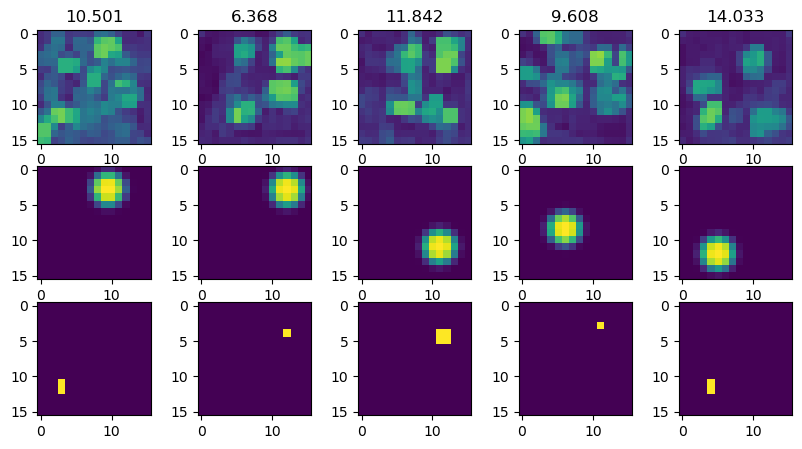

Epoch: 11, Train Loss: 0.0108 Test Loss: 0.0131
sum tensor(15.6589)
tensor([[0.1009, 0.1332, 0.1778, 0.1732, 0.1394, 0.1487, 0.1511, 0.1253, 0.2237,
         0.2353, 0.2023, 0.1433, 0.0874, 0.0730, 0.0484, 0.1450],
        [0.0966, 0.1332, 0.1905, 0.1905, 0.1394, 0.1882, 0.1882, 0.2311, 0.5673,
         0.6269, 0.6340, 0.4449, 0.0922, 0.1082, 0.1125, 0.1148],
        [0.0907, 0.1642, 0.1699, 0.1578, 0.0885, 0.1787, 0.1787, 0.2680, 0.6522,
         0.6807, 0.6066, 0.6066, 0.1296, 0.1354, 0.1345, 0.1106]])


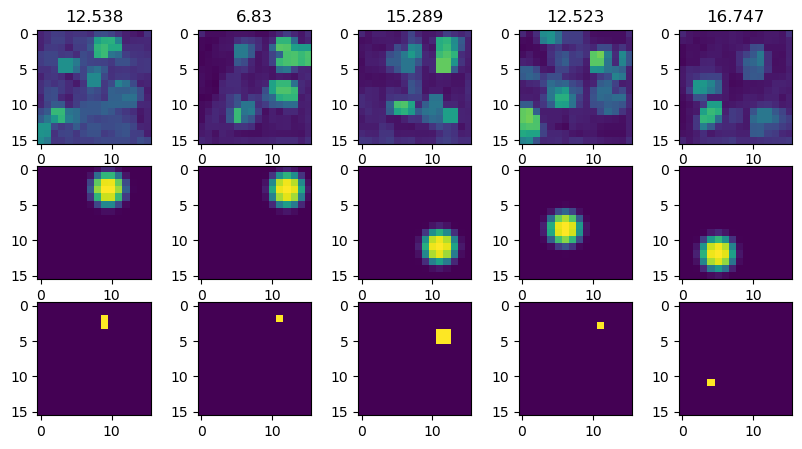

Epoch: 12, Train Loss: 0.0114 Test Loss: 0.0124
sum tensor(15.6589)
tensor([[0.1171, 0.1531, 0.2133, 0.2062, 0.1681, 0.1814, 0.1857, 0.1608, 0.2681,
         0.2733, 0.2294, 0.1672, 0.1182, 0.0972, 0.0620, 0.1537],
        [0.1153, 0.1531, 0.2110, 0.2110, 0.1681, 0.2230, 0.2330, 0.2818, 0.5818,
         0.6445, 0.6419, 0.5217, 0.1152, 0.1292, 0.1326, 0.1097],
        [0.1113, 0.1899, 0.1909, 0.1729, 0.1004, 0.2114, 0.2215, 0.3176, 0.6625,
         0.6871, 0.6519, 0.6519, 0.1515, 0.1663, 0.1631, 0.1260]])


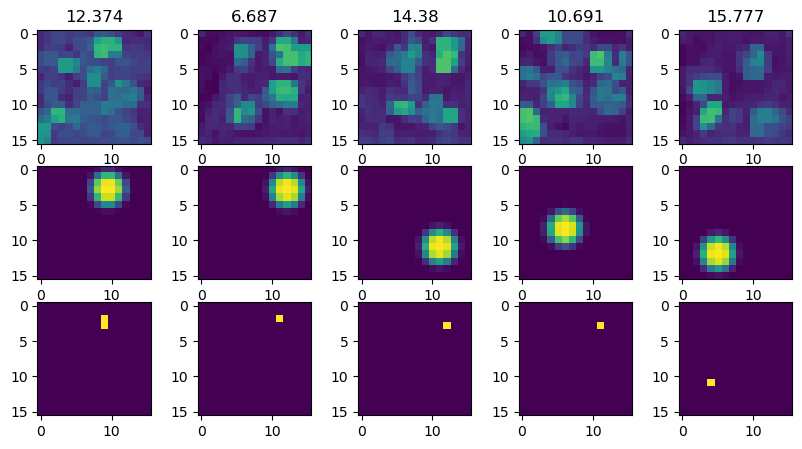

Epoch: 13, Train Loss: 0.0113 Test Loss: 0.0103
sum tensor(15.6589)
tensor([[0.1123, 0.1448, 0.3335, 0.3335, 0.1768, 0.1768, 0.1911, 0.1712, 0.4035,
         0.4035, 0.3365, 0.2179, 0.1524, 0.1524, 0.0868, 0.1342],
        [0.0983, 0.1335, 0.3760, 0.3760, 0.1768, 0.3555, 0.3555, 0.3223, 0.6243,
         0.7289, 0.7371, 0.5916, 0.1326, 0.1546, 0.1579, 0.1412],
        [0.0903, 0.3644, 0.3846, 0.3281, 0.1354, 0.3555, 0.3555, 0.3702, 0.7177,
         0.7293, 0.7371, 0.6931, 0.1787, 0.1848, 0.1751, 0.1543]])


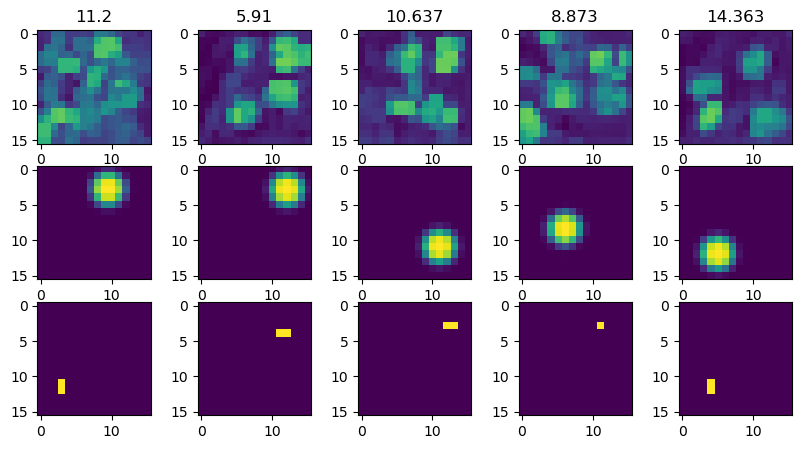

Epoch: 14, Train Loss: 0.0116 Test Loss: 0.0109
sum tensor(15.6589)
tensor([[0.1556, 0.1895, 0.3048, 0.2945, 0.1934, 0.2112, 0.2216, 0.2095, 0.3674,
         0.3674, 0.3078, 0.2314, 0.1599, 0.1421, 0.0941, 0.1598],
        [0.1517, 0.1894, 0.2839, 0.2839, 0.1934, 0.2925, 0.2925, 0.3359, 0.5840,
         0.6687, 0.6862, 0.5424, 0.1534, 0.1711, 0.1736, 0.1501],
        [0.1746, 0.2870, 0.2870, 0.2333, 0.1422, 0.2786, 0.2815, 0.3771, 0.6763,
         0.6929, 0.6862, 0.6631, 0.1931, 0.2062, 0.1948, 0.1659]])


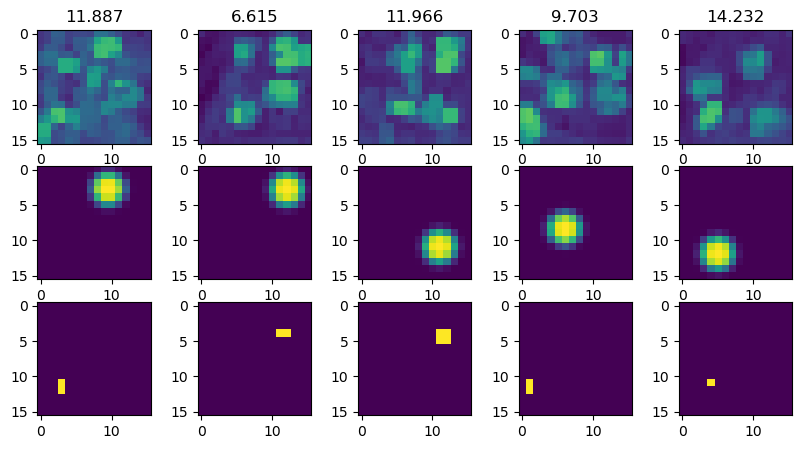

Epoch: 15, Train Loss: 0.0118 Test Loss: 0.0136
sum tensor(15.6589)
tensor([[0.1247, 0.1620, 0.1942, 0.1677, 0.1661, 0.1796, 0.1829, 0.1496, 0.2546,
         0.2598, 0.2138, 0.1699, 0.1161, 0.0879, 0.0665, 0.1538],
        [0.1234, 0.1620, 0.1630, 0.1640, 0.1661, 0.1917, 0.2035, 0.2748, 0.5387,
         0.5989, 0.5693, 0.4505, 0.1212, 0.1428, 0.1440, 0.1135],
        [0.1088, 0.1637, 0.1637, 0.1296, 0.1010, 0.1812, 0.2002, 0.3067, 0.5852,
         0.6185, 0.5676, 0.5660, 0.1526, 0.1735, 0.1698, 0.1251]])


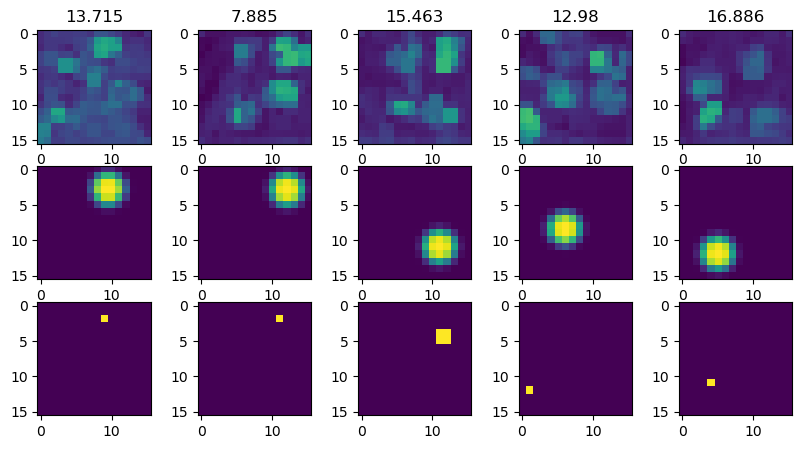

Epoch: 16, Train Loss: 0.0113 Test Loss: 0.0111
sum tensor(15.6589)
tensor([[0.1156, 0.1392, 0.2451, 0.2451, 0.1538, 0.1522, 0.1362, 0.1006, 0.3123,
         0.3130, 0.2769, 0.1834, 0.1018, 0.1018, 0.0836, 0.1298],
        [0.0864, 0.1113, 0.2518, 0.2351, 0.1470, 0.2627, 0.2627, 0.2170, 0.5093,
         0.6440, 0.6797, 0.3491, 0.1176, 0.1558, 0.1558, 0.1277],
        [0.0494, 0.2791, 0.2916, 0.2158, 0.1395, 0.2627, 0.2627, 0.2690, 0.6703,
         0.6865, 0.6692, 0.5817, 0.1584, 0.1624, 0.1645, 0.1304]])


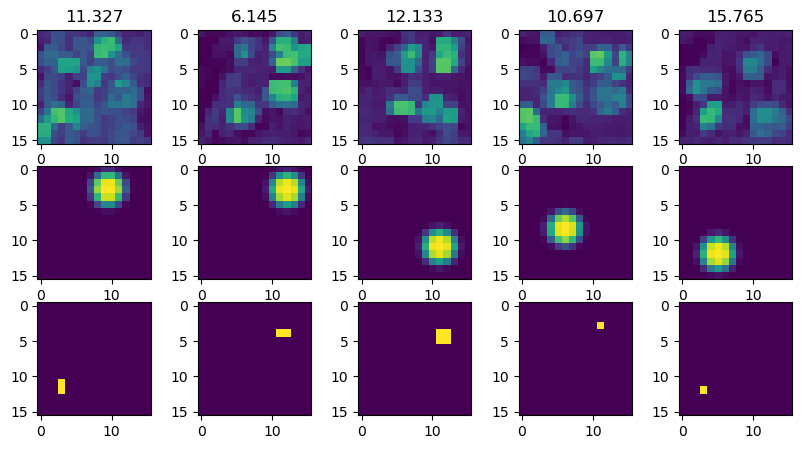

Epoch: 17, Train Loss: 0.0105 Test Loss: 0.0111
sum tensor(15.6589)
tensor([[0.1213, 0.1489, 0.2379, 0.2379, 0.1556, 0.1633, 0.1701, 0.1396, 0.3263,
         0.3275, 0.2762, 0.2052, 0.1202, 0.1050, 0.0745, 0.1330],
        [0.1097, 0.1334, 0.2358, 0.2358, 0.1516, 0.2533, 0.2533, 0.2596, 0.4868,
         0.6370, 0.6968, 0.4388, 0.1158, 0.1587, 0.1587, 0.1296],
        [0.1023, 0.2430, 0.2461, 0.1795, 0.1173, 0.2533, 0.2533, 0.3228, 0.6828,
         0.7016, 0.6968, 0.6614, 0.1643, 0.1710, 0.1678, 0.1378]])


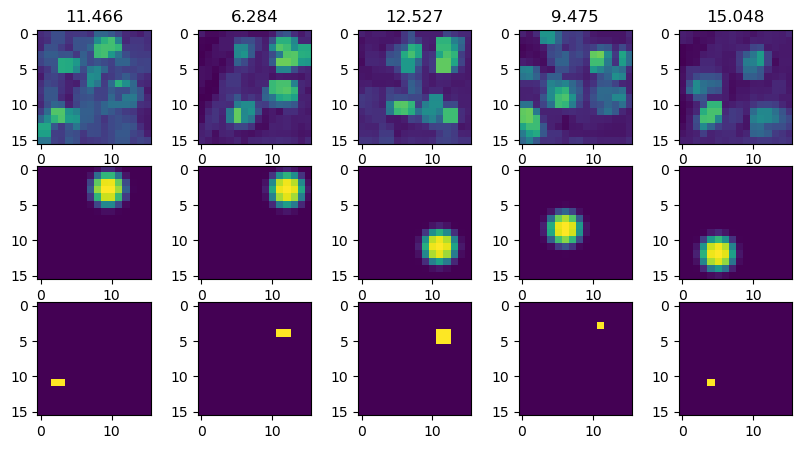

Epoch: 18, Train Loss: 0.0104 Test Loss: 0.0113
sum tensor(15.6589)
tensor([[0.1291, 0.1521, 0.2437, 0.2436, 0.1582, 0.1729, 0.1816, 0.1506, 0.2833,
         0.3110, 0.3040, 0.2116, 0.1231, 0.1133, 0.0798, 0.1317],
        [0.1216, 0.1415, 0.2452, 0.2424, 0.1582, 0.2481, 0.2481, 0.2274, 0.3347,
         0.5541, 0.6724, 0.3237, 0.1207, 0.1527, 0.1534, 0.1343],
        [0.1189, 0.2264, 0.2314, 0.1862, 0.1176, 0.2481, 0.2481, 0.2992, 0.6118,
         0.6401, 0.6892, 0.6892, 0.1677, 0.1692, 0.1664, 0.1434]])


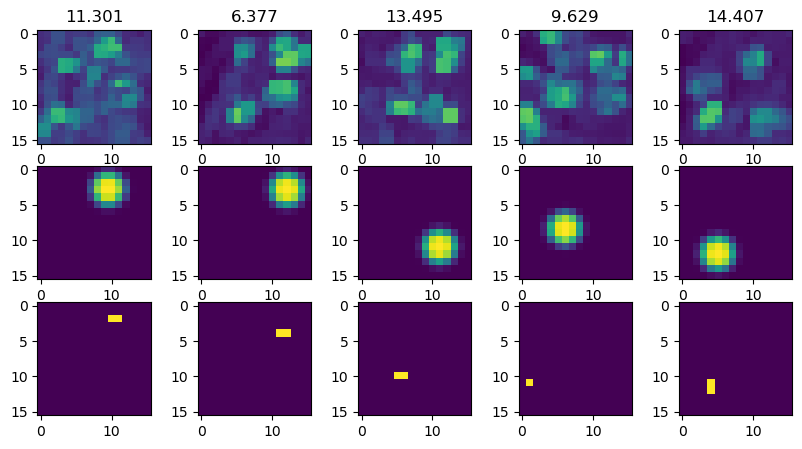

Epoch: 19, Train Loss: 0.0099 Test Loss: 0.0102
sum tensor(15.6589)
tensor([[0.1086, 0.1281, 0.2594, 0.2594, 0.1512, 0.1512, 0.1462, 0.1084, 0.3017,
         0.3514, 0.3440, 0.2119, 0.1096, 0.1094, 0.0890, 0.1046],
        [0.0838, 0.0991, 0.3266, 0.2757, 0.1402, 0.2627, 0.2590, 0.1853, 0.3900,
         0.6570, 0.7399, 0.2847, 0.1200, 0.1585, 0.1585, 0.1428],
        [0.0627, 0.2857, 0.3140, 0.2377, 0.1358, 0.2627, 0.2590, 0.2624, 0.7141,
         0.7141, 0.7267, 0.6463, 0.1715, 0.1604, 0.1604, 0.1460]])


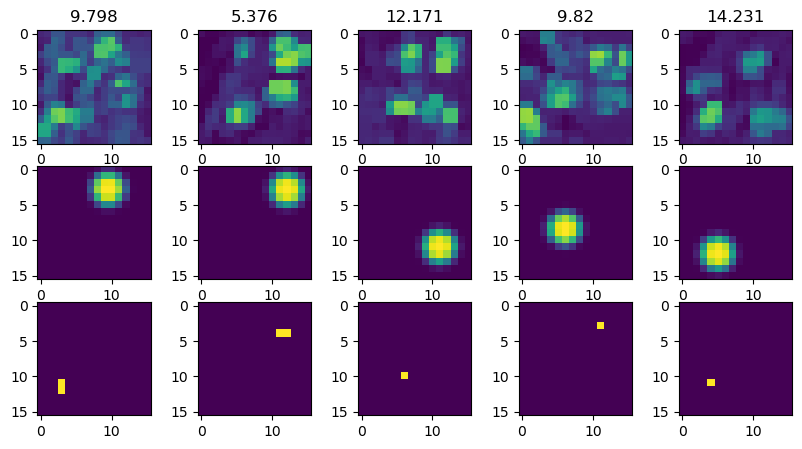

KeyboardInterrupt: 

In [90]:
%run v2_training_classes
model = Model_Training(16)
model.train(db2, epochs=50)

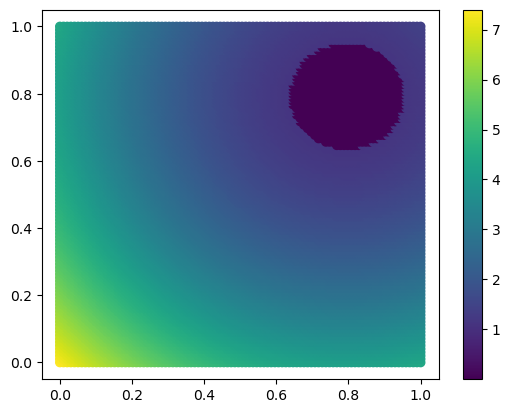

In [ ]:
inputs = np.linspace(0,1,100)
xx, yy = np.meshgrid(inputs, inputs)
coordinates = np.vstack([xx.ravel(), yy.ravel()]).T
coordinates_torch = torch.from_numpy(coordinates).float()
output = np.tile(np.array([0.8,0.8]), (len(coordinates),1))
output_torch = torch.from_numpy(output).float()
# get loss of coordinates by EuclideanDistanceLoss
squared_diff = (output_torch - coordinates_torch) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
from matplotlib import pyplot as plt
plt.scatter(coordinates[:,0], coordinates[:,1], c=loss)
plt.colorbar()

[[0.         0.        ]
 [0.01010101 0.01010101]
 [0.02020202 0.02020202]
 [0.03030303 0.03030303]
 [0.04040404 0.04040404]
 [0.05050505 0.05050505]
 [0.06060606 0.06060606]
 [0.07070707 0.07070707]
 [0.08080808 0.08080808]
 [0.09090909 0.09090909]
 [0.1010101  0.1010101 ]
 [0.11111111 0.11111111]
 [0.12121212 0.12121212]
 [0.13131313 0.13131313]
 [0.14141414 0.14141414]
 [0.15151515 0.15151515]
 [0.16161616 0.16161616]
 [0.17171717 0.17171717]
 [0.18181818 0.18181818]
 [0.19191919 0.19191919]
 [0.2020202  0.2020202 ]
 [0.21212121 0.21212121]
 [0.22222222 0.22222222]
 [0.23232323 0.23232323]
 [0.24242424 0.24242424]
 [0.25252525 0.25252525]
 [0.26262626 0.26262626]
 [0.27272727 0.27272727]
 [0.28282828 0.28282828]
 [0.29292929 0.29292929]
 [0.3030303  0.3030303 ]
 [0.31313131 0.31313131]
 [0.32323232 0.32323232]
 [0.33333333 0.33333333]
 [0.34343434 0.34343434]
 [0.35353535 0.35353535]
 [0.36363636 0.36363636]
 [0.37373737 0.37373737]
 [0.38383838 0.38383838]
 [0.39393939 0.39393939]


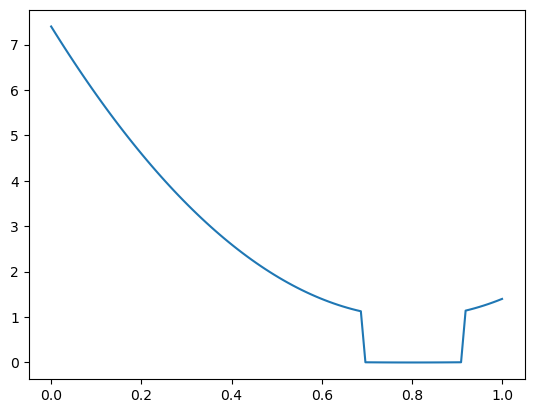

In [ ]:
coords = np.repeat(np.linspace(0,1,100).reshape(-1,1),2, axis=1)
print(coords)
target = np.repeat([[0.8,0.8]], 100, axis=0)
print(target)
squared_diff = (torch.Tensor(target) - torch.tensor(coords)) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
print(loss)
from matplotlib import pyplot as plt
plt.plot(coords[:,0], loss)


In [ ]:
%run v2_training.py
images = [Image.open("../../data/images/v2/"+path) for path in db2.get_solved_captchas(count=10)[0]]
pred = model.predict_pil(images)
pred

x shape: (10, 3, 333, 334)
[[[[0.07008781 0.08130052 0.06819378 ... 0.1046728  0.08788208
    0.05002504]
   [0.10949898 0.05839239 0.06384087 ... 0.10294366 0.09646493
    0.06245683]
   [0.1017279  0.06739557 0.10272032 ... 0.0582967  0.06266524
    0.06245683]
   ...
   [0.01761175 0.02063547 0.0200888  ... 0.2513382  0.02840753
    0.02407574]
   [0.01468239 0.01859847 0.01746179 ... 0.13640958 0.02680907
    0.02358828]
   [0.03370273 0.02535735 0.02369609 ... 0.03908027 0.03106354
    0.03350914]]]


 [[[0.03349361 0.08567592 0.04941691 ... 0.03350689 0.04580721
    0.04675459]
   [0.02624059 0.04490566 0.04101309 ... 0.05577389 0.05149353
    0.04357711]
   [0.12355521 0.05655445 0.03228347 ... 0.04534376 0.03252211
    0.03380131]
   ...
   [0.3389918  0.42858094 0.24765079 ... 0.04187018 0.04442246
    0.03994256]
   [0.30498296 0.30649862 0.17145163 ... 0.03551057 0.03911634
    0.03873467]
   [0.0468392  0.0468392  0.03750788 ... 0.04026232 0.03726564
    0.03799679]]]


 [[

array([[[[0.07008781, 0.08130052, 0.06819378, ..., 0.1046728 ,
          0.08788208, 0.05002504],
         [0.10949898, 0.05839239, 0.06384087, ..., 0.10294366,
          0.09646493, 0.06245683],
         [0.1017279 , 0.06739557, 0.10272032, ..., 0.0582967 ,
          0.06266524, 0.06245683],
         ...,
         [0.01761175, 0.02063547, 0.0200888 , ..., 0.2513382 ,
          0.02840753, 0.02407574],
         [0.01468239, 0.01859847, 0.01746179, ..., 0.13640958,
          0.02680907, 0.02358828],
         [0.03370273, 0.02535735, 0.02369609, ..., 0.03908027,
          0.03106354, 0.03350914]]],


       [[[0.03349361, 0.08567592, 0.04941691, ..., 0.03350689,
          0.04580721, 0.04675459],
         [0.02624059, 0.04490566, 0.04101309, ..., 0.05577389,
          0.05149353, 0.04357711],
         [0.12355521, 0.05655445, 0.03228347, ..., 0.04534376,
          0.03252211, 0.03380131],
         ...,
         [0.3389918 , 0.42858094, 0.24765079, ..., 0.04187018,
          0.04442246, 0

In [ ]:
%run v2_handler.py
for i in range(len(images)):
    display_image_with_circle(images[i], pred[i])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
assert 1 == 0

In [ ]:
%run v2_manual_classifier.py
Manual_Classifier(db2)

In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--enable-features=DarkMode")
# options.add_argument("--headless")

wd = webdriver.Chrome(options)
wd.get("https://accounts.hcaptcha.com/demo")

In [ ]:
image_paths = db2.get_unsolved_captchas()
for i in range(len(image_paths)):
    image = Image.open("../"+image_paths[i])
    display(image)

In [ ]:
%run v2_handler.py
v2h = V2_Handler(db2)
v2h.solve_v2(wd)